In [29]:
import pandas as pd
from tqdm import tqdm
from narratives import narratives

tqdm.pandas()

In [30]:
df = pd.read_csv('../../data/telegram/messages_scraped.csv')

/var/folders/fb/v6scng3j5lbcmnb3mjn82zhr0000gn/T/ipykernel_21133/3619779779.py:1: DtypeWarning: Columns (24,25,27,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/telegram/messages_scraped.csv')


In [31]:
narratives['nazis_in_ukraine']

{'languages': ['en', 'ru'],
 'keywords': {'en': ['Nazis in Ukraine',
   'Ukrainian Nazis',
   'Neo-Nazi movements',
   'Fascist groups in Ukraine',
   'Eliminate Nazi influence',
   'Fight against fascism'],
  'ru': ['нацисты в Украине',
   'украинские нацисты',
   'неонацистские движения',
   'фашистские группы в Украине',
   'геноцид нацистов',
   'ликвидировать нацистское влияние',
   'бороться с фашизмом']},
 'description': {'en': 'Portrays the presence or resurgence of Nazi elements within Ukraine to justify military actions and demonize the Ukrainian government.',
  'ru': 'Изображает присутствие или возрождение нацистских элементов в Украине для оправдания военных действий и демонизации украинского правительства.'}}

In [32]:
keywords_splits = []
for k in narratives['nazis_in_ukraine']['keywords']['ru']:
    keywords_splits.extend(k.split(' '))
keywords_splits

['нацисты',
 'в',
 'Украине',
 'украинские',
 'нацисты',
 'неонацистские',
 'движения',
 'фашистские',
 'группы',
 'в',
 'Украине',
 'геноцид',
 'нацистов',
 'ликвидировать',
 'нацистское',
 'влияние',
 'бороться',
 'с',
 'фашизмом']

In [ ]:
sample = df.sample(100_000)
sample['nazi_narrative_sim'] = sample.messageText.progress_apply(lambda x: any(naming in x for naming in keywords_splits))

  0%|          | 36/10000 [00:00<03:09, 52.53it/s]/var/folders/fb/v6scng3j5lbcmnb3mjn82zhr0000gn/T/ipykernel_21133/2657929206.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  sims.append(k_emb.similarity(m_emb))
100%|██████████| 10000/10000 [03:11<00:00, 52.19it/s]


In [27]:
for i, r in sample[sample.nazi_narrative_sim == sample.nazi_narrative_sim.max()].iterrows():
    print(r.messageText, r.nazi_narrative_sim)
    print('='*100)

⚡️Репортаж военного корреспондента @anna_news из Мариуполя

Российские и республиканские военные завершают операцию по разрезанию группировки украинской армии в Мариуполе.

Последние оставшиеся в городе украинские силовики разделены в двух котлах, где идет их планомерное уничтожение. 0.7231575778481949


<Axes: >

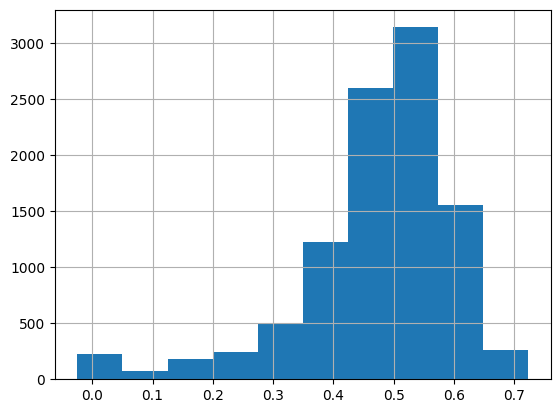

In [28]:
sample.nazi_narrative_sim.hist()